In [3]:
# Import rpy2 and necessary modules to interface with R
import rpy2.robjects as ro
from rpy2.robjects.packages import importr
from rpy2.robjects import pandas2ri

In [4]:
import rpy2.robjects.packages as rpackages
from rpy2.robjects.vectors import StrVector

# Select a CRAN mirror to download from
utils = rpackages.importr('utils')
utils.chooseCRANmirror(ind=1)  # Select the first mirror

# Install 'remotes' if it's not already installed
if not rpackages.isinstalled('remotes'):
    utils.install_packages(StrVector(('remotes',)))
    
import rpy2.robjects as ro

# Run the GitHub installation command for 'treevalues'
ro.r('remotes::install_github("anna-neufeld/treevalues")')



R[write to console]: Using GitHub PAT from the git credential store.

R[write to console]: Skipping install of 'treevalues' from a github remote, the SHA1 (55573782) has not changed since last install.
  Use `force = TRUE` to force installation



In [5]:
# Activate automatic conversion between pandas and R data frames
pandas2ri.activate()

# Import R libraries
treevalues = importr('treevalues')
rpart = importr('rpart')

# Load the data
ro.r('data(blsdata, package="treevalues")')
blsdata = ro.r('blsdata')

# Define the rpart tree model
bls_tree = ro.r('bls.tree <- rpart(kcal24h0~hunger+disinhibition+resteating+rrvfood+liking+wanting, model = TRUE, data = blsdata, cp=0.02)')

# Plot the tree values (this will plot directly if you have a plotting backend set up)
ro.r('treeval.plot(bls.tree, inferenceType=0)')

# Get the branch information for a specific branch in the tree (node 11 in this case)
ro.r('branch <- getBranch(bls.tree, 8)')
branch = ro.r('branch')
print(f'Branch: {branch}')

# Perform branch inference
branch_inference_result = ro.r('result <- branchInference(bls.tree, branch, type="sib")')

# Get confidence intervals
confint = ro.r('result$confint')
print(f'Confidence Interval: {confint}')

# Get p-value
pval = ro.r('result$pval')
print(f'P-Value: {pval}')


R[write to console]: In addition: 
R[write to console]: Warning message:

R[write to console]: labs do not fit even at cex 0.15, there may be some overplotting 



Branch: ['hunger  < 10.5' 'wanting  < -40.531939285' 'resteating  >= 13.5']
Confidence Interval: [-1106.74698816   136.55225297]
P-Value: [0.90025551]


In [6]:
print(blsdata)

        trt        sex     bmi0       skcal    srvgfv0    srvgssb  kcal24h0
1   Control Female = 2 26.51648  440.282000  2.4443333 3.94833333 2605.2743
2   Control Female = 2 35.24811  288.793333  2.6476667 1.33333333 1316.1770
3   Control Female = 2 33.11673   88.862000  0.8103333 1.72200000 1542.9413
4   Control Female = 2 20.21915  419.753333  1.8140000 3.06266667 2302.5420
5   Control Female = 2 34.58216  529.783333  9.3816667 0.00000000 1668.3110
6   Control Female = 2 31.72234  257.084333  5.4433333 0.00000000 1124.2260
7   Control   Male = 1 28.94627 1591.940000  2.2270000 2.44466667 4074.0737
8   Control Female = 2 31.71257  294.772000  3.2580000 0.00000000 1504.8173
9   Control Female = 2 21.37787  449.984000  3.5303333 0.00000000 1763.0890
10  Control Female = 2 44.84612   94.273333  2.1863333 0.09366667 3278.9813
11  Control Female = 2 36.38078  316.805333  0.8513333 2.72600000 2138.6430
12  Control   Male = 1 24.76635 1147.913667  5.3103333 1.03133333 3559.4893
13  Control 

In [7]:
# Convert the R dataframe to a pandas DataFrame
blsdata_pd = pandas2ri.rpy2py(blsdata)

# Convert the pandas DataFrame to a NumPy matrix
blsdata_np = blsdata_pd.to_numpy()

In [8]:
blsdata_pd

,trt,sex,bmi0,skcal,srvgfv0,srvgssb,kcal24h0,edeq01,edeq02,edeq13,...,cdrsbody0,weighfreq0,freqff,age,resteating,disinhibition,hunger,liking,wanting,rrvfood
1,1,1,26.516478,440.282000,2.444333,3.948333,2605.274333,2,1,0,...,7,5,3,44.583162,6,3,2,-3.625,-12.076457,0.200000
2,1,1,35.248105,288.793333,2.647667,1.333333,1316.177000,1,1,3,...,7,3,2,38.026010,4,4,2,-17.500,-32.683615,0.666667
3,1,1,33.116729,88.862000,0.810333,1.722000,1542.941333,1,1,1,...,8,3,2,33.160849,3,5,2,-20.500,-53.949852,0.500000
4,1,1,20.219152,419.753333,1.814000,3.062667,2302.542000,1,1,4,...,5,3,2,35.260780,1,3,1,-6.125,-7.265917,0.500000
5,1,1,34.582158,529.783333,9.381667,0.000000,1668.311000,6,1,3,...,8,5,1,57.875428,17,9,3,-20.625,-46.812750,0.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,4,2,26.296842,698.849667,2.294333,0.390667,2055.779667,1,1,10,...,7,3,5,44.561259,7,6,5,11.125,37.813345,0.800000
223,4,2,20.491523,792.675667,0.616000,0.500000,2647.699667,1,1,3,...,5,3,1,27.991786,8,3,0,-51.000,-51.573532,0.500000
224,4,2,24.220460,460.431333,7.353000,0.000000,2491.595000,1,1,0,...,6,3,1,29.596167,10,0,2,-26.500,-52.464241,1.000000
225,4,1,21.434004,294.921333,4.001667,0.000000,1051.784667,1,1,2,...,5,5,1,26.828200,7,4,4,-41.625,-87.079720,0.500000


In [9]:
Y = blsdata_pd["kcal24h0"]

In [10]:
X = blsdata_pd[["hunger", "disinhibition", "resteating",
                "rrvfood", "liking", "wanting"]]

In [11]:
X

,hunger,disinhibition,resteating,rrvfood,liking,wanting
1,2,3,6,0.200000,-3.625,-12.076457
2,2,4,4,0.666667,-17.500,-32.683615
3,2,5,3,0.500000,-20.500,-53.949852
4,1,3,1,0.500000,-6.125,-7.265917
5,3,9,17,0.666667,-20.625,-46.812750
...,...,...,...,...,...,...
222,5,6,7,0.800000,11.125,37.813345
223,0,3,8,0.500000,-51.000,-51.573532
224,2,0,10,1.000000,-26.500,-52.464241
225,4,4,7,0.500000,-41.625,-87.079720


In [12]:
import numpy as np
from CART import RegressionTree
from Utils.plotting import  *
from Utils.simulation_helpers import *
from time import time

In [13]:
sd_y = np.std(Y)
sd_y

np.float64(684.031193879005)

In [14]:
X_np = np.array(X)
Y_np = np.array(Y)

In [15]:
# Create and train the regression tree
reg_tree = RegressionTree(min_samples_split=10, max_depth=3, min_proportion=0.05)
reg_tree.fit(X_np, Y_np, sd = 0.1)

In [16]:
X_np.shape

(226, 6)

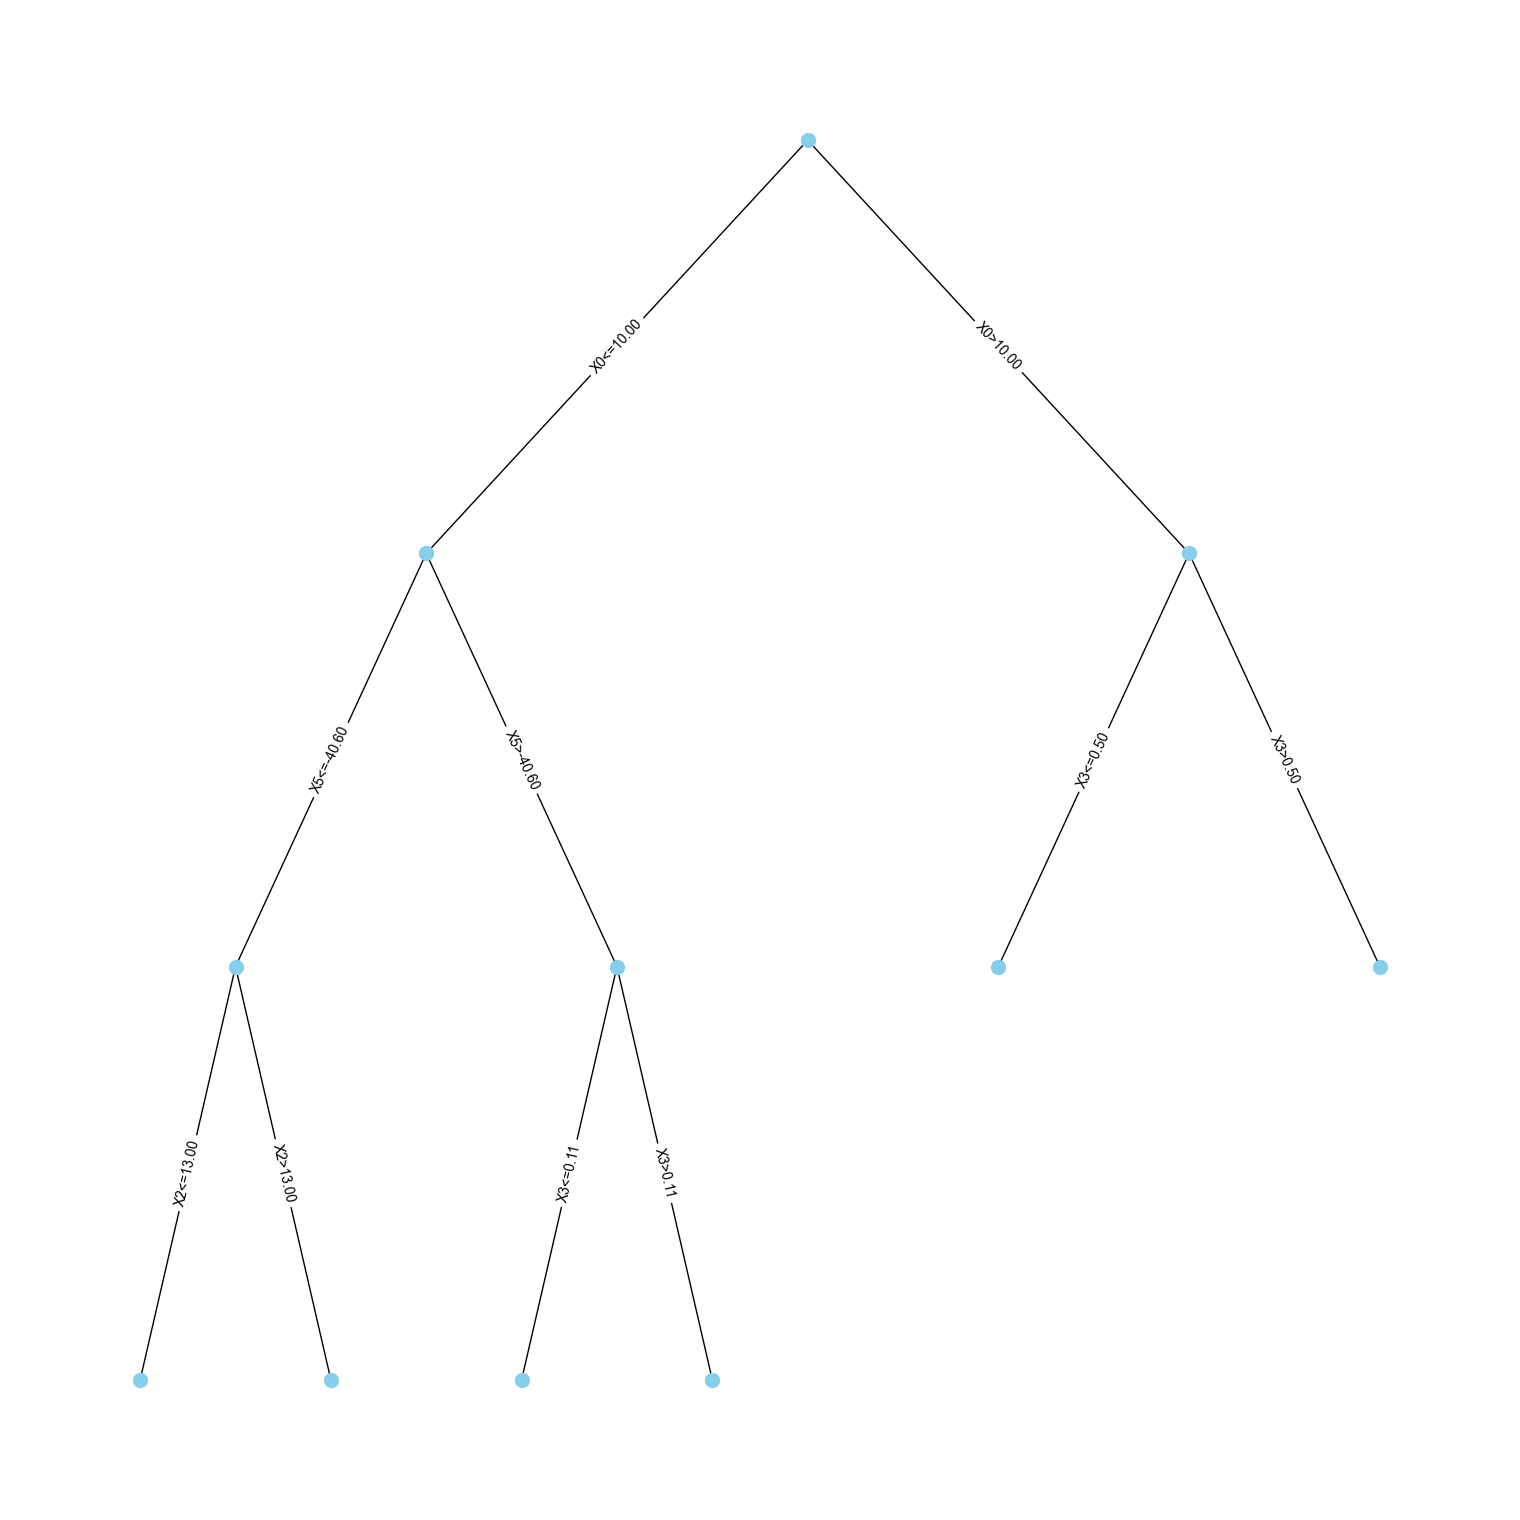

In [17]:
#["hunger", "disinhibition", "resteating", "rrvfood", "liking", "wanting"]
draw_tree(reg_tree.root)

In [47]:
# Plot the tree values (this will plot directly if you have a plotting backend set up)
ro.r('treeval.plot(bls.tree, inferenceType=0)')

R[write to console]: In addition: 
R[write to console]: Warning message:

R[write to console]: labs do not fit even at cex 0.15, there may be some overplotting 



In [48]:
np.sqrt(np.mean((Y_np - reg_tree.predict(X_np))**2))

np.float64(511.773144678427)